# Import Dependencies

In [ ]:
import pandas as pd
import os
import sys
import urllib.request
import glob
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

# Grabbing data

Grabbing NYISO data from 2023.The data is a five minute interval dataset with day ahead zone lbmp, real time zone price, and real time fuel mix.

In [2]:
print(dir(os))

['DirEntry', 'F_OK', 'GenericAlias', 'Mapping', 'MutableMapping', 'O_APPEND', 'O_BINARY', 'O_CREAT', 'O_EXCL', 'O_NOINHERIT', 'O_RANDOM', 'O_RDONLY', 'O_RDWR', 'O_SEQUENTIAL', 'O_SHORT_LIVED', 'O_TEMPORARY', 'O_TEXT', 'O_TRUNC', 'O_WRONLY', 'P_DETACH', 'P_NOWAIT', 'P_NOWAITO', 'P_OVERLAY', 'P_WAIT', 'PathLike', 'R_OK', 'SEEK_CUR', 'SEEK_END', 'SEEK_SET', 'TMP_MAX', 'W_OK', 'X_OK', '_AddedDllDirectory', '_Environ', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_check_methods', '_execvpe', '_exists', '_exit', '_fspath', '_get_exports_list', '_walk', '_wrap_close', 'abc', 'abort', 'access', 'add_dll_directory', 'altsep', 'chdir', 'chmod', 'close', 'closerange', 'cpu_count', 'curdir', 'defpath', 'device_encoding', 'devnull', 'dup', 'dup2', 'environ', 'error', 'execl', 'execle', 'execlp', 'execlpe', 'execv', 'execve', 'execvp', 'execvpe', 'extsep', 'fdopen', 'fsdecode', 'fsencode', 'fspath', 'fstat', 'fsync', 'ftruncate

In [3]:
os.makedirs("./zone_damlbmp")
os.makedirs("./rtfuel_mix")
os.makedirs("./realtime_zone")


FileExistsError: [WinError 183] 當檔案已存在時，無法建立該檔案。: './zone_damlbmp'

In [5]:
month_lst = ['01','02','03','04','05','06','07','08','09','10','11','12']
year_month = "202404"
for month in month_lst:
    time = '2023'+ month
    urllib.request.urlretrieve("http://mis.nyiso.com/public/csv/damlbmp/" + time + "01damlbmp_zone_csv.zip",  "./zone_damlbmp/"+ time + "data.zip")
    urllib.request.urlretrieve("http://mis.nyiso.com/public/csv/realtime/" + time + "01realtime_zone_csv.zip",  "./realtime_zone/"+ time + "data.zip")
    urllib.request.urlretrieve("http://mis.nyiso.com/public/csv/rtfuelmix/" + time + "01rtfuelmix_csv.zip",  "./rtfuel_mix/"+ time + "data.zip")

KeyboardInterrupt: 

In [ ]:
for month in month_lst:
    time = '2023'+ month
    with zipfile.ZipFile("./rtfuel_mix/" + time + "data.zip","r") as zip_ref:
        zip_ref.extractall("./rtfuel_mix")

In [6]:
ff = os.listdir("./rtfuel_mix/")

fuel_list = []

for i in ff:
    temp = pd.read_csv("./rtfuel_mix/" + i)
    fuel_list.append(temp)

fuel = pd.concat(fuel_list)



In [169]:
dayahead = os.listdir("./zone_damlbmp/")

dayahead_lst = []

for i in dayahead:
    temp = pd.read_csv("./zone_damlbmp/" + i)
    dayahead_lst.append(temp)

dayahead_price = pd.concat(dayahead_lst)

In [12]:
RT = os.listdir("./realtime_zone/")

RT_lst = []

for i in RT:
    temp = pd.read_csv("./realtime_zone/" + i)
    RT_lst.append(temp)

RT_price = pd.concat(RT_lst)

In [167]:
display(fuel)
display(dayahead_price)
display(RT_price)

,Time Stamp,Time Zone,Fuel Category,Gen MW,Year,Month,Day,Hour,Minute
0,2023-01-01 00:05:00,EST,Dual Fuel,2423.0,2023,1,1,0,5
1,2023-01-01 00:05:00,EST,Natural Gas,2742.0,2023,1,1,0,5
2,2023-01-01 00:05:00,EST,Nuclear,3344.0,2023,1,1,0,5
3,2023-01-01 00:05:00,EST,Other Fossil Fuels,5.0,2023,1,1,0,5
4,2023-01-01 00:05:00,EST,Other Renewables,237.0,2023,1,1,0,5
...,...,...,...,...,...,...,...,...,...
2011,2024-01-01 00:00:00,EST,Nuclear,3309.0,2024,1,1,0,0
2012,2024-01-01 00:00:00,EST,Other Fossil Fuels,7.0,2024,1,1,0,0
2013,2024-01-01 00:00:00,EST,Other Renewables,229.0,2024,1,1,0,0
2014,2024-01-01 00:00:00,EST,Wind,31.0,2024,1,1,0,0


,Time Stamp,Name,PTID,DA_LBMP ($/MWHr),DA_Marginal Cost Losses ($/MWHr),DA_Marginal Cost Congestion ($/MWHr),Year,Month,Day,Hour,Minute,date_dist
0,2023-01-01 00:00:00,CAPITL,61757,37.70,0.98,-16.80,2023,1,1,0,0,NaT
1,2023-01-01 00:00:00,CENTRL,61754,21.88,-0.04,-2.00,2023,1,1,0,0,0 days
2,2023-01-01 00:00:00,DUNWOD,61760,33.22,1.47,-11.82,2023,1,1,0,0,0 days
3,2023-01-01 00:00:00,GENESE,61753,21.14,-0.42,-1.63,2023,1,1,0,0,0 days
4,2023-01-01 00:00:00,H Q,61844,19.63,-0.30,0.00,2023,1,1,0,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2023-12-31 23:00:00,NORTH,61755,25.22,0.22,0.00,2023,12,31,23,0,0 days
131396,2023-12-31 23:00:00,NPX,61845,25.64,0.65,0.00,2023,12,31,23,0,0 days
131397,2023-12-31 23:00:00,O H,61846,24.05,-0.95,0.00,2023,12,31,23,0,0 days
131398,2023-12-31 23:00:00,PJM,61847,24.09,-0.05,0.86,2023,12,31,23,0,0 days


,Time Stamp,Name,PTID,RT_LBMP ($/MWHr),RT_Marginal Cost Losses ($/MWHr),RT_Marginal Cost Congestion ($/MWHr)
0,2023-01-01 00:05:00,CAPITL,61757,29.57,1.31,-3.98
1,2023-01-01 00:05:00,CENTRL,61754,24.53,-0.22,-0.47
2,2023-01-01 00:05:00,DUNWOD,61760,28.82,1.75,-2.80
3,2023-01-01 00:05:00,GENESE,61753,23.86,-0.80,-0.38
4,2023-01-01 00:05:00,H Q,61844,24.06,-0.22,0.00
...,...,...,...,...,...,...
4315,2024-01-01 00:00:00,NORTH,61755,31.91,1.02,0.00
4316,2024-01-01 00:00:00,NPX,61845,31.48,0.59,0.00
4317,2024-01-01 00:00:00,O H,61846,28.73,-2.16,0.00
4318,2024-01-01 00:00:00,PJM,61847,30.44,-0.37,0.08


# Data cleaning
### Fuel mix

In [172]:
print(fuel.isna().sum())
fuel["Time Stamp"] = pd.to_datetime(fuel["Time Stamp"])

Time Stamp       0
Time Zone        0
Fuel Category    0
Gen MW           0
Year             0
Month            0
Day              0
Hour             0
Minute           0
dtype: int64


In [21]:
fuel['Year'] = pd.DatetimeIndex(fuel['Time Stamp']).year
fuel['Month'] = pd.DatetimeIndex(fuel['Time Stamp']).month
fuel['Day'] = pd.DatetimeIndex(fuel['Time Stamp']).day
fuel['Hour'] = pd.DatetimeIndex(fuel['Time Stamp']).hour
fuel['Minute'] = pd.DatetimeIndex(fuel['Time Stamp']).minute

In [176]:
num_cat = fuel['Fuel Category'].nunique()

In [178]:
print(f'There are {num_cat} fuel categories')

There are 7 fuel categories


In [179]:
fuel.set_index(fuel["Time Stamp"], inplace=True)

In [181]:
off_peak = fuel.between_time('23:00:00', '06:59:59')
on_peak = fuel.between_time('07:00:00', '22:59:59')

In [196]:
off_peak_avg = off_peak.groupby(['Fuel Category']).mean()
off_peak_avg['percent'] = off_peak_avg['Gen MW'] / off_peak_avg['Gen MW'].sum()
display(off_peak_avg.groupby(['Fuel Category']).mean())
on_peak_avg = on_peak.groupby(['Fuel Category']).mean()
on_peak_avg['percent'] = on_peak_avg['Gen MW'] / on_peak_avg['Gen MW'].sum()
display(on_peak_avg.groupby(['Fuel Category']).mean())

,Gen MW,Year,Month,Day,Hour,Minute,percent
Fuel Category,,,,,,,
Dual Fuel,3218.152540,2023.000028,6.511537,15.714604,5.490666,27.467817,0.257623
Hydro,2529.853475,2023.000028,6.511537,15.714604,5.490666,27.467817,0.202522
Natural Gas,2798.782783,2023.000028,6.511537,15.714604,5.490666,27.467817,0.224051
Nuclear,3145.320897,2023.000028,6.511537,15.714604,5.490666,27.467817,0.251793
Other Fossil Fuels,8.065270,2023.000028,6.511537,15.714604,5.490666,27.467817,0.000646
Other Renewables,231.603214,2023.000028,6.511537,15.714604,5.490666,27.467817,0.018541
Wind,559.938261,2023.000028,6.511537,15.714604,5.490666,27.467817,0.044825


,Gen MW,Year,Month,Day,Hour,Minute,percent
Fuel Category,,,,,,,
Dual Fuel,4228.350420,2023.0,6.509063,15.706953,14.484324,27.521607,0.278825
Hydro,3391.209027,2023.0,6.509063,15.706953,14.484324,27.521607,0.223622
Natural Gas,3581.941959,2023.0,6.509063,15.706953,14.484324,27.521607,0.236199
Nuclear,3146.099822,2023.0,6.509063,15.706953,14.484324,27.521607,0.207459
Other Fossil Fuels,25.431935,2023.0,6.509063,15.706953,14.484324,27.521607,0.001677
Other Renewables,265.282230,2023.0,6.509063,15.706953,14.484324,27.521607,0.017493
Wind,526.586540,2023.0,6.509063,15.706953,14.484324,27.521607,0.034724


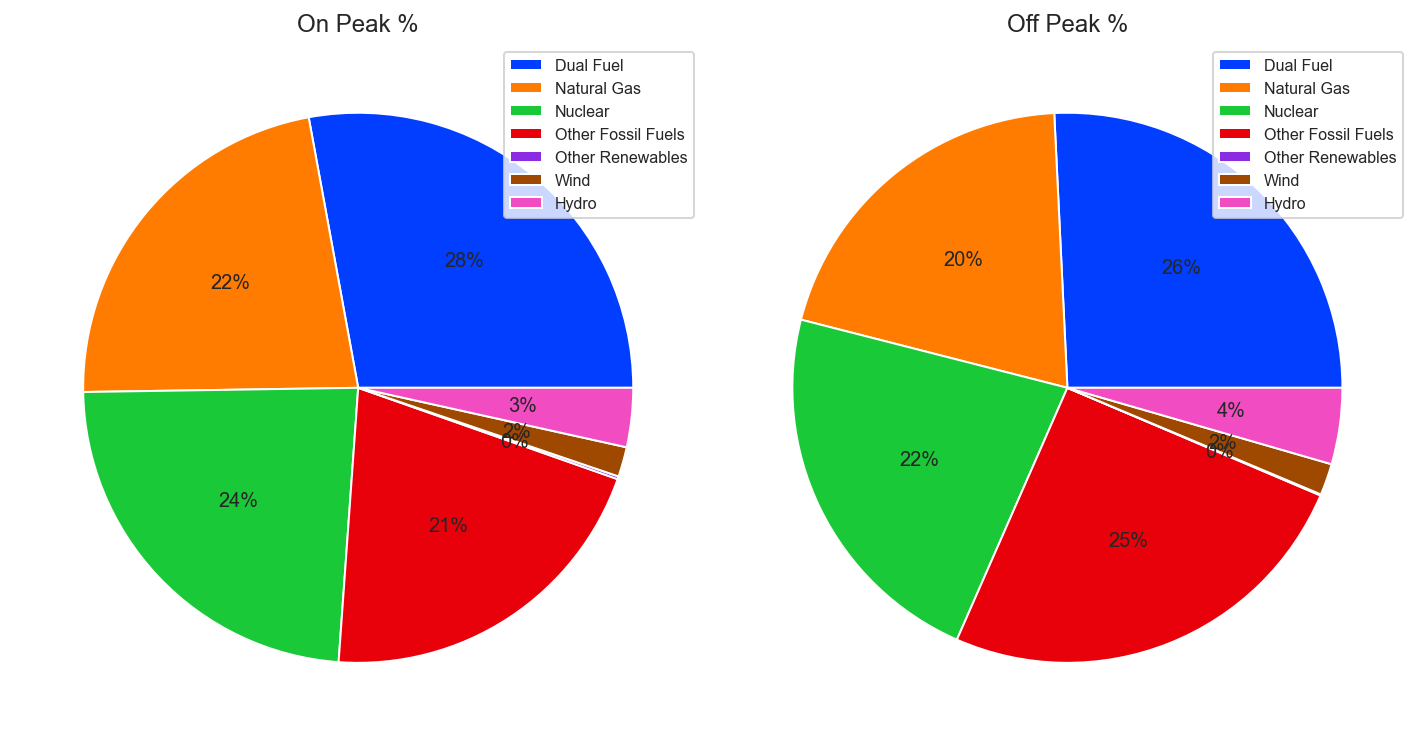

In [250]:
fig = plt.figure(figsize=(10,8),dpi=144)
ax1 = fig.add_subplot(121)
keys = off_peak['Fuel Category'].unique().tolist()
palette_color = sns.color_palette('bright') 
ax1.pie(on_peak_avg['percent'], colors=palette_color, autopct='%.0f%%')
ax1.legend(labels=keys, fontsize="8")
ax1.set_title('On Peak %')
ax2 = fig.add_subplot(122)
ax2.pie(off_peak_avg['percent'], colors=palette_color, autopct='%.0f%%')
ax2.legend(labels=keys, fontsize="8")
ax2.set_title('Off Peak %')
plt.tight_layout()

In [253]:
fuel

,Time Stamp,Time Zone,Fuel Category,Gen MW,Year,Month,Day,Hour,Minute
Time Stamp,,,,,,,,,
2023-01-01 00:05:00,2023-01-01 00:05:00,EST,Dual Fuel,2423.0,2023,1,1,0,5
2023-01-01 00:05:00,2023-01-01 00:05:00,EST,Natural Gas,2742.0,2023,1,1,0,5
2023-01-01 00:05:00,2023-01-01 00:05:00,EST,Nuclear,3344.0,2023,1,1,0,5
2023-01-01 00:05:00,2023-01-01 00:05:00,EST,Other Fossil Fuels,5.0,2023,1,1,0,5
2023-01-01 00:05:00,2023-01-01 00:05:00,EST,Other Renewables,237.0,2023,1,1,0,5
...,...,...,...,...,...,...,...,...,...
2024-01-01 00:00:00,2024-01-01 00:00:00,EST,Nuclear,3309.0,2024,1,1,0,0
2024-01-01 00:00:00,2024-01-01 00:00:00,EST,Other Fossil Fuels,7.0,2024,1,1,0,0
2024-01-01 00:00:00,2024-01-01 00:00:00,EST,Other Renewables,229.0,2024,1,1,0,0


### dayahead_price

In [168]:
print(dayahead_price.isna().sum())

Time Stamp                              0
Name                                    0
PTID                                    0
DA_LBMP ($/MWHr)                        0
DA_Marginal Cost Losses ($/MWHr)        0
DA_Marginal Cost Congestion ($/MWHr)    0
Year                                    0
Month                                   0
Day                                     0
Hour                                    0
Minute                                  0
date_dist                               1
dtype: int64


In [99]:
dayahead_price.rename(columns={"LBMP ($/MWHr)": "DA_LBMP ($/MWHr)", "Marginal Cost Losses ($/MWHr)": "DA_Marginal Cost Losses ($/MWHr)","Marginal Cost Congestion ($/MWHr)": "DA_Marginal Cost Congestion ($/MWHr)"},inplace = True)
RT_price.rename(columns={"LBMP ($/MWHr)": "RT_LBMP ($/MWHr)", "Marginal Cost Losses ($/MWHr)": "RT_Marginal Cost Losses ($/MWHr)","Marginal Cost Congestion ($/MWHr)": "RT_Marginal Cost Congestion ($/MWHr)"},inplace = True)

In [116]:
dayahead_price["Time Stamp"] = pd.to_datetime(dayahead_price["Time Stamp"])

In [156]:
dayahead_price['Year'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).year
dayahead_price['Month'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).month
dayahead_price['Day'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).day
dayahead_price['Hour'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).hour
dayahead_price['Minute'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).minute

In [166]:
dayahead_price.Name.nunique()
#There are 15 unique zones in the LBMP, each with a different code

In [ ]:
dayahead_price